In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import keras

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold

In [4]:
df = pd.read_csv('../data/sonar.csv', header=None)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [22]:
dataset = df.values
X = dataset[:, :60].astype(np.float64) # 숫자라도 astype을 해 주는 것이 좋음.
Y_obj = dataset[:, 60]
e = LabelEncoder() # 
e.fit(Y_obj)
Y = e.transform(Y_obj)
# Y_encoded = to_categorical(Y) # one hit encoding을 하면 안됨. 이중 분류이기 때문에

In [15]:
X


array([[0.02  , 0.0371, 0.0428, ..., 0.0084, 0.009 , 0.0032],
       [0.0453, 0.0523, 0.0843, ..., 0.0049, 0.0052, 0.0044],
       [0.0262, 0.0582, 0.1099, ..., 0.0164, 0.0095, 0.0078],
       ...,
       [0.0522, 0.0437, 0.018 , ..., 0.0138, 0.0077, 0.0031],
       [0.0303, 0.0353, 0.049 , ..., 0.0079, 0.0036, 0.0048],
       [0.026 , 0.0363, 0.0136, ..., 0.0036, 0.0061, 0.0115]])

In [23]:
np.random.seed(3)
tf.random.set_seed(3)

In [24]:
model = Sequential()
model.add(Dense(24, input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [25]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
model.fit(X, Y, epochs=200, batch_size=5)

Epoch 1/200
42/42 [==============================] - 2s 3ms/step - loss: 0.6795 - accuracy: 0.5913
Epoch 2/200
42/42 [==============================] - 0s 3ms/step - loss: 0.6517 - accuracy: 0.6250
Epoch 3/200
42/42 [==============================] - 0s 3ms/step - loss: 0.6328 - accuracy: 0.6587
Epoch 4/200
42/42 [==============================] - 0s 3ms/step - loss: 0.5994 - accuracy: 0.7067
Epoch 5/200
42/42 [==============================] - 0s 3ms/step - loss: 0.5664 - accuracy: 0.7644
Epoch 6/200
42/42 [==============================] - 0s 3ms/step - loss: 0.5420 - accuracy: 0.7500
Epoch 7/200
42/42 [==============================] - 0s 3ms/step - loss: 0.5088 - accuracy: 0.7644
Epoch 8/200
42/42 [==============================] - 0s 3ms/step - loss: 0.4829 - accuracy: 0.7740
Epoch 9/200
42/42 [==============================] - 0s 3ms/step - loss: 0.4707 - accuracy: 0.7788
Epoch 10/200
42/42 [==============================] - 0s 3ms/step - loss: 0.4490 - accuracy: 0.7788
Epoch 11/

42/42 [==============================] - 0s 3ms/step - loss: 0.1334 - accuracy: 0.9471
Epoch 82/200
42/42 [==============================] - 0s 3ms/step - loss: 0.1357 - accuracy: 0.9567
Epoch 83/200
42/42 [==============================] - 0s 3ms/step - loss: 0.1252 - accuracy: 0.9615
Epoch 84/200
42/42 [==============================] - 0s 2ms/step - loss: 0.1269 - accuracy: 0.9471
Epoch 85/200
42/42 [==============================] - 0s 3ms/step - loss: 0.1247 - accuracy: 0.9567
Epoch 86/200
42/42 [==============================] - 0s 3ms/step - loss: 0.1225 - accuracy: 0.9567
Epoch 87/200
42/42 [==============================] - 0s 3ms/step - loss: 0.1137 - accuracy: 0.9663
Epoch 88/200
42/42 [==============================] - 0s 3ms/step - loss: 0.1556 - accuracy: 0.9327
Epoch 89/200
42/42 [==============================] - 0s 3ms/step - loss: 0.1131 - accuracy: 0.9712
Epoch 90/200
42/42 [==============================] - 0s 3ms/step - loss: 0.1113 - accuracy: 0.9615
Epoch 91/200


42/42 [==============================] - 0s 3ms/step - loss: 0.0224 - accuracy: 1.0000
Epoch 161/200
42/42 [==============================] - 0s 4ms/step - loss: 0.0194 - accuracy: 1.0000
Epoch 162/200
42/42 [==============================] - 0s 3ms/step - loss: 0.0185 - accuracy: 0.9952
Epoch 163/200
42/42 [==============================] - 0s 3ms/step - loss: 0.0295 - accuracy: 1.0000
Epoch 164/200
42/42 [==============================] - 0s 3ms/step - loss: 0.0324 - accuracy: 0.9952
Epoch 165/200
42/42 [==============================] - 0s 3ms/step - loss: 0.0188 - accuracy: 1.0000
Epoch 166/200
42/42 [==============================] - 0s 3ms/step - loss: 0.0175 - accuracy: 1.0000
Epoch 167/200
42/42 [==============================] - 0s 3ms/step - loss: 0.0144 - accuracy: 1.0000
Epoch 168/200
42/42 [==============================] - 0s 3ms/step - loss: 0.0187 - accuracy: 1.0000
Epoch 169/200
42/42 [==============================] - 0s 4ms/step - loss: 0.0166 - accuracy: 1.0000
Epoc

In [28]:
result = model.evaluate(X,Y, verbose=0)
print('loss: % .4f,  accuracy: %.4f' %(result[0], result[1]))

loss:  0.0051,  accuracy: 1.0000


In [30]:
seed = 1234
np.random.seed(seed)
tf.random.set_seed(seed)

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

In [32]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((145, 60), (63, 60), (145,), (63,))

In [38]:
model = Sequential()
model.add(Dense(24, input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [39]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [40]:
model.fit(X_train, Y_train, epochs=100, batch_size=5)

Epoch 1/100
29/29 [==============================] - 2s 3ms/step - loss: 0.6792 - accuracy: 0.6276
Epoch 2/100
29/29 [==============================] - 0s 5ms/step - loss: 0.6613 - accuracy: 0.6759
Epoch 3/100
29/29 [==============================] - 0s 6ms/step - loss: 0.6437 - accuracy: 0.7379
Epoch 4/100
29/29 [==============================] - 0s 4ms/step - loss: 0.6241 - accuracy: 0.7379
Epoch 5/100
29/29 [==============================] - 0s 4ms/step - loss: 0.6027 - accuracy: 0.7655
Epoch 6/100
29/29 [==============================] - 0s 4ms/step - loss: 0.5806 - accuracy: 0.7724
Epoch 7/100
29/29 [==============================] - 0s 3ms/step - loss: 0.5633 - accuracy: 0.7517
Epoch 8/100
29/29 [==============================] - 0s 3ms/step - loss: 0.5486 - accuracy: 0.7724
Epoch 9/100
29/29 [==============================] - 0s 3ms/step - loss: 0.5358 - accuracy: 0.7586
Epoch 10/100
29/29 [==============================] - 0s 3ms/step - loss: 0.5289 - accuracy: 0.7655
Epoch 11/

29/29 [==============================] - 0s 3ms/step - loss: 0.0835 - accuracy: 0.9931
Epoch 83/100
29/29 [==============================] - 0s 4ms/step - loss: 0.0844 - accuracy: 0.9793
Epoch 84/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0860 - accuracy: 0.9931
Epoch 85/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0690 - accuracy: 1.0000
Epoch 86/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0601 - accuracy: 1.0000
Epoch 87/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0624 - accuracy: 1.0000
Epoch 88/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0598 - accuracy: 1.0000
Epoch 89/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0620 - accuracy: 1.0000
Epoch 90/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0563 - accuracy: 1.0000
Epoch 91/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0587 - accuracy: 0.9931
Epoch 92/100


In [41]:
result = model.evaluate(X_test, Y_test, verbose=0)
print('loss: %.4f, accuracy: %.4f' %(result[0], result[1]))

loss: 0.3787, accuracy: 0.8730


In [43]:
model.save('my_model.h5')

In [44]:
del model

In [45]:
model

NameError: name 'model' is not defined

In [46]:
new_model = load_model('my_model.h5')

In [47]:
new_model

In [48]:
result = new_model.evaluate(X_test, Y_test, verbose=0)
print('loss: %.4f, accuracy: %.4f' %(result[0], result[1]))

loss: 0.3787, accuracy: 0.8730


In [59]:
model = Sequential()
model.add(Dense(24, input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [60]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [61]:
for i in range(0,30):
    model.fit(X_train, Y_train, epochs=10, batch_size=5, verbose=0)
    result = model.evaluate(X_test, Y_test, verbose=0)
    print('epochs: %3d, loss: %.4f, accuracy: %.4f' %((i+1)*10, result[0], result[1]))
    print('--------------------------------------------------')

epochs:  10, loss: 0.5997, accuracy: 0.6667
--------------------------------------------------
epochs:  20, loss: 0.5076, accuracy: 0.7143
--------------------------------------------------
epochs:  30, loss: 0.4501, accuracy: 0.7460
--------------------------------------------------
epochs:  40, loss: 0.4081, accuracy: 0.7619
--------------------------------------------------
epochs:  50, loss: 0.3806, accuracy: 0.7778
--------------------------------------------------
epochs:  60, loss: 0.3573, accuracy: 0.8413
--------------------------------------------------
epochs:  70, loss: 0.3578, accuracy: 0.8889
--------------------------------------------------
epochs:  80, loss: 0.3606, accuracy: 0.8889
--------------------------------------------------
epochs:  90, loss: 0.3721, accuracy: 0.8889
--------------------------------------------------
epochs: 100, loss: 0.3828, accuracy: 0.8889
--------------------------------------------------
epochs: 110, loss: 0.3941, accuracy: 0.8889
------

In [ ]:
x1 = []
y1= []
y2 = []
for i in range(0,30):
    model.fit(X_train, Y_train, epochs=10, batch_size=5, verbose=0)
    result = model.evaluate(X_test, Y_test, verbose=0)
    print('epochs: %3d, loss: %.4f, accuracy: %.4f' %((i+1)*10, result[0], result[1]))
    x1.append((i+1)*10)
    y1.append(result[0])
    y2.append(result[1])
    print('--------------------------------------------------')

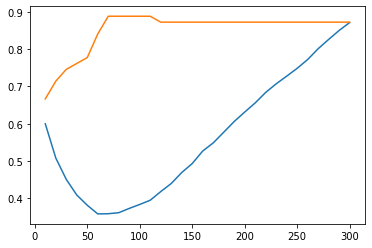

In [62]:
plt.plot(x1,y1)
plt.plot(x1,y2)

In [68]:
n_fold = 10
skf = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=seed)

In [69]:
for train, test in skf.split(X,Y): # train, test 는 index list임 데이터가 아님.
    print('train:', train)
    print('test:', test)
    print('---------------------------')

train: [  0   1   2   3   4   5   6   7   8   9  11  12  13  14  15  17  18  19
  20  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38
  39  42  43  44  45  46  47  48  49  51  52  53  54  55  56  57  58  59
  60  61  63  64  65  66  67  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  98 100 101
 102 103 104 105 107 108 111 112 113 114 116 117 118 119 120 121 122 123
 124 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 187 188 189 190 192 193 194 195 196 197 198
 199 200 201 202 204 206 207]
test: [ 10  16  21  40  41  50  62  68  69  70  97  99 106 109 110 115 125 186
 191 203 205]
---------------------------
train: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  23  24  25  26

In [76]:
accuracy = []
for train, test in skf.split(X,Y):
    model = Sequential()
    model.add(Dense(24, input_dim=60, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])
    
    model.fit(X[train], Y[train], epochs=100, batch_size=5, verbose=0)
    
    accuracy.append(model.evaluate(X[test], Y[test], verbose=0)[1])
    
print('%d fold, test accuracy list: ' %(n_fold), accuracy)

10 fold, test accuracy list:  [0.8571428656578064, 0.9047619104385376, 0.9047619104385376, 0.6666666865348816, 0.8571428656578064, 0.761904776096344, 0.9523809552192688, 0.9523809552192688, 0.800000011920929, 0.800000011920929]


In [87]:
print('%d fold, test accuracy list: ' %(n_fold), accuracy)

10 fold, test accuracy list:  [0.8571428656578064, 0.9047619104385376, 0.9047619104385376, 0.6666666865348816, 0.8571428656578064, 0.761904776096344, 0.9523809552192688, 0.9523809552192688, 0.800000011920929, 0.800000011920929]


In [86]:
print('test accuracy:', np.array(accuracy).mean()) # 평균

test accuracy: 0.8457142949104309


In [83]:
aa = np.array([[1,2,3,4],[5,6,7,8], [9,10,11,12]])

In [84]:
aa.shape


(3, 4)

In [85]:
aa[[1,2]]

array([[ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [88]:
accuracy = []
model = Sequential()
model.add(Dense(24, input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

for train, test in skf.split(X,Y):
    model.fit(X[train], Y[train], epochs=20, batch_size=5, verbose=0)
    accuracy.append(model.evaluate(X[test], Y[test], verbose=0)[1])
    
print('%d fold, test accuracy list: ' %(n_fold), accuracy) 
# k fold 교차 검증을 할때 과적합이 많이 나타난다. epochs도 크게 잡지 말아야 한다. n-fold도 크게 잡지 말아야 한다.

10 fold, test accuracy list:  [0.7142857313156128, 0.8571428656578064, 0.9047619104385376, 0.8095238208770752, 0.8571428656578064, 1.0, 1.0, 1.0, 1.0, 1.0]


In [89]:
print('test accuracy:', np.array(accuracy).mean()) 

test accuracy: 0.9142857193946838
